<a href="https://colab.research.google.com/github/RuchitaThombare/AtlantaCrime/blob/main/Atlanta_Crime_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 357745 entries, 0 to 14830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   offense_id         357745 non-null  int64  
 1   rpt_date           357745 non-null  object 
 2   occur_date         357745 non-null  object 
 3   occur_time         357745 non-null  object 
 4   beat               357701 non-null  float64
 5   location           357743 non-null  object 
 6   watch              357354 non-null  object 
 7   crime_type         357745 non-null  object 
 8   crime_type_number  357745 non-null  int64  
 9   neighborhood       344695 non-null  object 
 10  lat                357745 non-null  float64
 11  long               357745 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 35.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 357745 entries, 0 to 14830
Data columns (total 12 columns):
 #   Column             Non-Nul

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


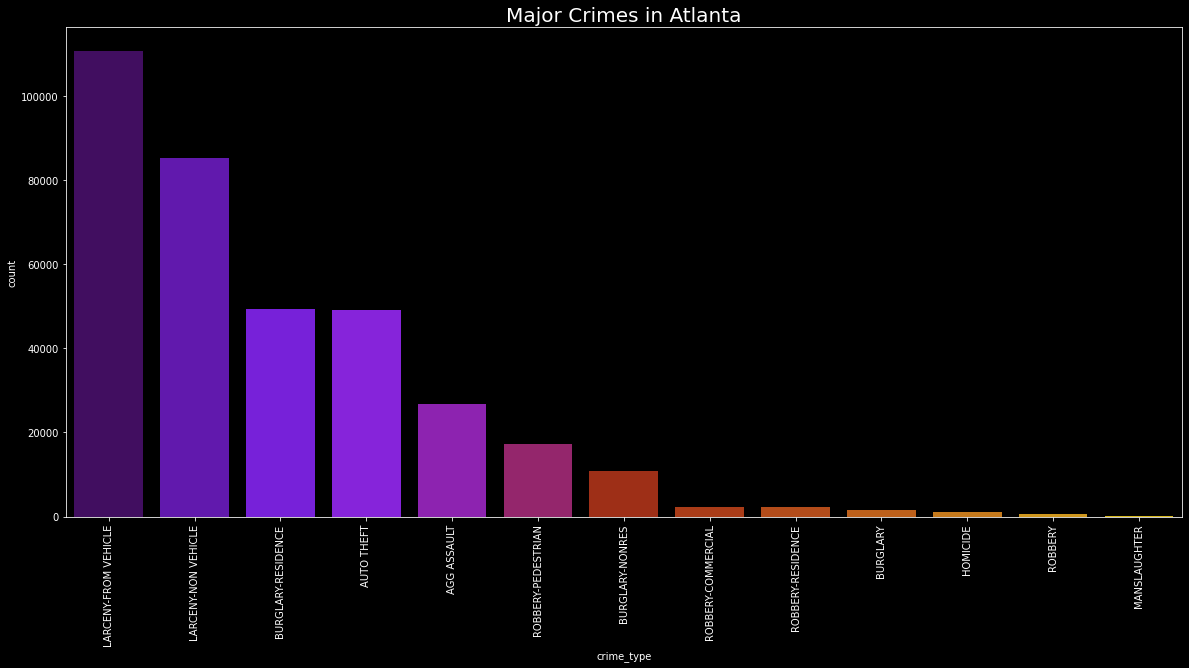

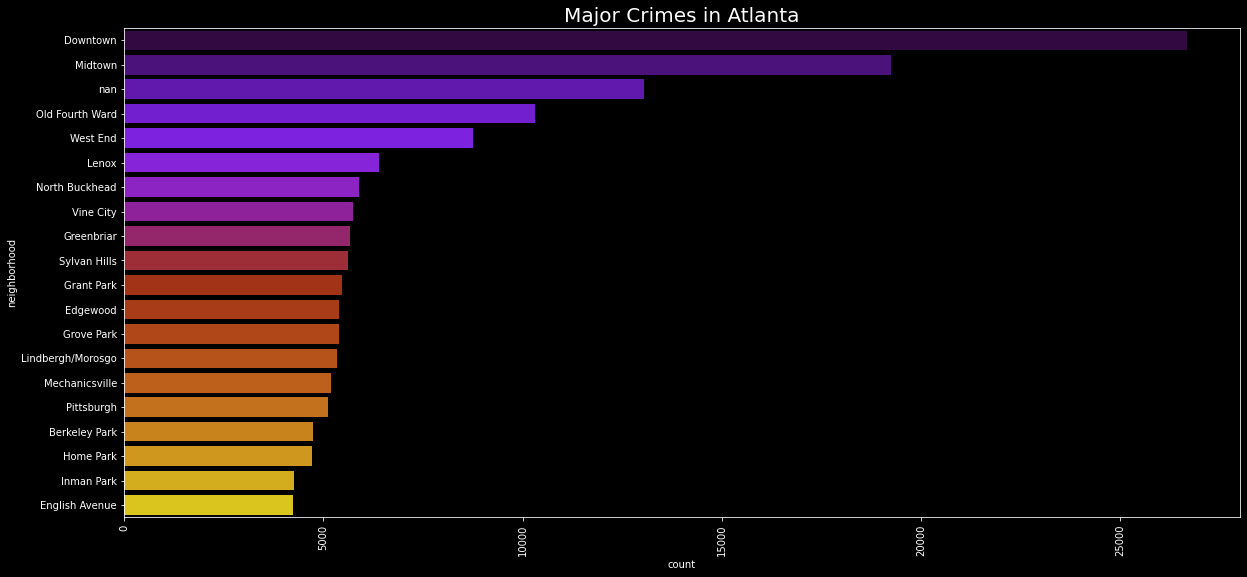

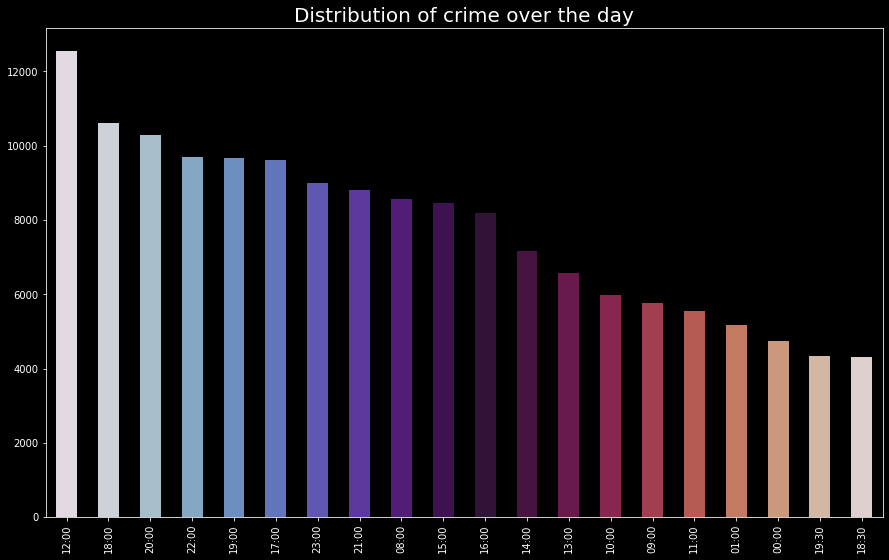

[2014. 2015. 2018. 2013. 2019. 2016. 2017. 2012. 2009. 2010. 2020. 2011.]


'\nm1 = \'Logistic Regression\'\nlr = LogisticRegression()\nmodel = lr.fit(X_train, y_train)\nlr_predict = lr.predict(X_test)\nlr_conf_matrix = confusion_matrix(y_test, lr_predict)\nlr_acc_score = accuracy_score(y_test, lr_predict)\nprint("confussion matrix")\nprint(lr_conf_matrix)\nprint("\n")\nprint("Accuracy of Logistic Regression:",lr_acc_score*100,\'\n\')\nprint(classification_report(y_test,lr_predict))\n\n'

In [2]:
import pandas as pd
#import pandas_profiling as pp
import numpy as np
#data preprocessing
from sklearn.model_selection import train_test_split
#import models
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#visualisation
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter

class convertToDate:

  def __init__(self, raw_date):
    self.raw_date = raw_date

  def convertToDate(self):
    temp_list = []
    for x in self.raw_date:
      if x != 'nan':
        xsplit = x.split('-')
        x = xsplit[1] + '/' + xsplit[2] + '/' + xsplit[0]
      else:
        x = 0
      temp_list.append(x)
    return temp_list


class convertToTime:

  def __init__(self, raw_time):
    self.raw_time = raw_time

  def convertToTime(self):
    temp_list = []
    for x in self.raw_time:
      if x != 'nan':
        xsplit = list(x)
        if len(x) == 4:
          x = str(xsplit[0]) + str(xsplit[1]) + ':' + str(xsplit[2]) + str(xsplit[3])
        if len(x) == 3:
          x = '0'+ str(xsplit[0])+ ':' + str(xsplit[1])  + str(xsplit[2])
        if len(x) == 2:
          x = '0'+ '0' + ':' + str(xsplit[0])  + str(xsplit[1])
        if len(x) == 1:
          x = '0'+ '0' + ':' + '0' + str(xsplit[0])
      else:
        x = '00:00'
      temp_list.append(x)
    return temp_list


df0 = pd.read_csv('COBRA-2009-2019.csv')
df1 = pd.read_csv('COBRA-2020-OldRMS-09292020.csv')

df0 = df0.drop(columns = ['Apartment Office Prefix','Apartment Number','Location Type','IBR Code','NPU', 'Possible Date', 'Possible Time'])
df0 = df0.rename(columns ={'Report Number': 'offense_id', 'Report Date':'rpt_date', 'Occur Date':'occur_date', 'Occur Time':'occur_time', 'Possible Date':'poss_date', 'Possible Time':'poss_time', 'Beat':'beat','Location':'location', 'Shift Occurence':'watch', 'UCR Literal':'crime_type', 'UCR #':'crime_type_number', 'Neighborhood':'neighborhood', 'Latitude':'lat', 'Longitude':'long'})

raw_rpt_date_obj = convertToDate(df0['rpt_date'])
df0['rpt_date'] = raw_rpt_date_obj.convertToDate()

raw_occur_date_obj = convertToDate(df0['occur_date'])
df0['occur_date'] = raw_occur_date_obj.convertToDate()

df0['occur_time'] = df0['occur_time'].astype(str)
raw_occur_time_obj = convertToTime(df0['occur_time'])
df0['occur_time'] = raw_occur_time_obj.convertToTime()

#df0.info()
df1 = df1.drop(columns = ['apartment_office_prefix', 'apartment_number', 'location_type', 'npu', 'poss_date', 'poss_time'])
df1 = df1.rename(columns = {'UC2_Literal':'crime_type', 'UCR_Number':'crime_type_number'})
#Ty using pd.concat([df1, df4], axis=1).reindex(df1.index)
df = pd.concat([df0, df1])
df.info()
df['beat'] = df['beat'].fillna(0)

df = df.astype({'offense_id': int, 'beat': int,'location': str, 'watch': str, 'crime_type': str, 'crime_type_number': int, 'neighborhood': str})
df.info()
df['occur_year'] = df['occur_date'].str.split('/').str[2]
df['occur_year'] = df['occur_year'].astype(int)
df.to_csv('out.csv')
df = df[(df['occur_year'] >= 2009) & (df['occur_year'] <= 2020)]
df


#pp.ProfileReport(df) #error is because of version issue in pandas
#Ty using pd.concat([df1, df4], axis=1).reindex(df1.index)

# different categories of crime

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['crime_type'], palette = 'gnuplot', order = df['crime_type'].value_counts().index)

plt.title('Major Crimes in Atlanta', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

###
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(y = df['neighborhood'], palette = 'gnuplot', order = df['neighborhood'].value_counts().iloc[:20].index)

plt.title('Major Crimes in Atlanta', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

# checking the time at which crime occurs mostly

import warnings
warnings.filterwarnings('ignore')

color = plt.cm.twilight(np.linspace(0, 5, 100))
df['occur_time'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()


# Model preparation

y = df["occur_year"].astype(float)
X = df.drop('occur_year',axis=1) #check this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

print(y_test.unique())
Counter(y_train)
'''
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

'''

